## WeatherPy_SKG

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [6]:
print(cities[:10])

['bandarbeyla', 'taolanaro', 'barrow', 'albany', 'ixtapa', 'corrente', 'faanui', 'tasiilaq', 'namibe', 'malwan']


In [7]:
# to print through our list with a numbered index
for i, city in enumerate(cities[:10]):
    # Group cities in sets of 50
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0
    
        print(f'{i}, {city}')

0, bandarbeyla
1, taolanaro
2, barrow
3, albany
4, ixtapa
5, corrente
6, faanui
7, tasiilaq
8, namibe
9, malwan


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c052c8f986aa8e02b478b48d49f29a68


In [9]:
query_url = url + "&q=" + cities[0]
response = requests.get(query_url).json()
print(response["name"])

Bandarbeyla


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#url = "https://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

#Test for url's and to make sure my api key is working 
#query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units 
#response = requests.get(query_url + city).json()
#weather_response = response.get(query_url)

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Create Counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # create the endpoint URL for each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    try:
        #query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
        
        response = requests.get(query_url).json()
        #weather_response = response.get(query_url)
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

    except:
        print("City not found. Skipping..")
        pass

Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping..
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ixtapa
Processing Record 6 of Set 1 | corrente
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | malwan
City not found. Skipping..
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | saleaula
City not found. Skipping..
Processing Record 17 of Set 1 | wenzhou
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | saint-francois
Processing Record 20 of Set 1 | mancio lima
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | m

Processing Record 38 of Set 4 | kalabo
Processing Record 39 of Set 4 | dwarka
Processing Record 40 of Set 4 | iracoubo
Processing Record 41 of Set 4 | fuxin
Processing Record 42 of Set 4 | takoradi
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | kamaishi
Processing Record 46 of Set 4 | maykain
City not found. Skipping..
Processing Record 47 of Set 4 | khonuu
City not found. Skipping..
Processing Record 48 of Set 4 | yaan
Processing Record 49 of Set 4 | xuanhua
Processing Record 50 of Set 4 | hermiston
Processing Record 1 of Set 5 | urazovo
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | borogontsy
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | nam tha
City not found. Skipping..
Processing Record 7 of Set 5 | nambucca heads
Processing Record 8 of Set 5 | flin flon
Processing Record 9 of Set 5 | coruripe
Processing Record 10 of Set 5 | khor

Processing Record 31 of Set 8 | baglung
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping..
Processing Record 35 of Set 8 | asfi
Processing Record 36 of Set 8 | bitung
Processing Record 37 of Set 8 | lakatoro
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | burnie
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | high level
Processing Record 42 of Set 8 | marzuq
Processing Record 43 of Set 8 | corner brook
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | porosozero
Processing Record 46 of Set 8 | krasne
Processing Record 47 of Set 8 | fujinomiya
Processing Record 48 of Set 8 | new ipswich
Processing Record 49 of Set 8 | punta cardon
Processing Record 50 of Set 8 | vostok
Processing Record 1 of Set 9 | sinop
Processing Record 2 of Set 9 | parana
Processing Record 3 of Set 9 | tottori
Processing Record 4 of Set 9 | plainv

Processing Record 20 of Set 12 | kuytun
Processing Record 21 of Set 12 | yulara
Processing Record 22 of Set 12 | biu
Processing Record 23 of Set 12 | mopti
Processing Record 24 of Set 12 | mathathane
Processing Record 25 of Set 12 | leshukonskoye
Processing Record 26 of Set 12 | belaya gora
Processing Record 27 of Set 12 | tommot
Processing Record 28 of Set 12 | vanavara
Processing Record 29 of Set 12 | novoilinsk
Processing Record 30 of Set 12 | lasa
Processing Record 31 of Set 12 | yarada
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | svetlogorsk
Processing Record 34 of Set 12 | pendleton
Processing Record 35 of Set 12 | hampton
Processing Record 36 of Set 12 | north bend
Processing Record 37 of Set 12 | ouadda
Processing Record 38 of Set 12 | rawannawi
City not found. Skipping..
Processing Record 39 of Set 12 | canico
Processing Record 40 of Set 12 | gerash
Processing Record 41 of Set 12 | nishihara
Processing Record 42 of Set 12 | nautanwa
Processing Re

In [11]:
# make a dictionary to hold the weather data for each city 
city_weather_dict = {"City": city_name,
                    "Lat": lat,
                    "Lng": long,
                    "Max Temp": max_temp,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_weather_df = pd.DataFrame.from_dict(city_weather_dict)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bandarbeyla,9.4942,50.8122,81.27,88,46,4.32,SO,1651716440
1,Barrow,71.2906,-156.7887,15.82,79,100,14.97,US,1651716458
2,Albany,42.6001,-73.9662,54.52,92,98,4.52,US,1651716349
3,Ixtapa,20.7000,-105.2000,77.23,78,75,8.05,MX,1651716458
4,Corrente,-3.7367,-43.3394,72.68,98,100,2.75,BR,1651716459


In [18]:
city_weather_df.to_csv('output_data/my_cities.csv', header=True, index=False, mode='w')

In [19]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.398550,15.055434,60.718136,72.628920,57.277003,7.650244,1.651717e+09
std,33.215267,88.046499,18.875602,20.456567,39.996225,4.953445,1.000011e+02
min,-54.800000,-179.166700,1.990000,1.000000,0.000000,0.000000,1.651716e+09
25%,-5.662250,-60.502550,48.412500,64.000000,16.000000,4.055000,1.651716e+09
50%,28.258050,19.505250,62.590000,78.000000,70.500000,6.400000,1.651717e+09
75%,49.473550,83.384825,77.430000,87.000000,100.000000,10.360000,1.651717e+09
max,78.218600,178.416700,95.110000,100.000000,100.000000,30.040000,1.651717e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
humid_cities = city_weather_df[(city_weather_df["Humidity"]>100)].index
humid_cities

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

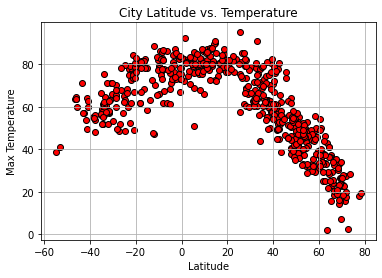

In [70]:
# This scatter plot is comparing the latitude of the cities and their temperature
# Prediction: the closer the city's latitude is to zero the higher its temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolors="red", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output_data/city_lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

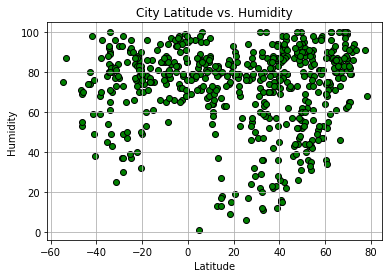

In [71]:
# This scatter plot is comparing the latitude of the cities and their humidity.
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolors="green", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/city_lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

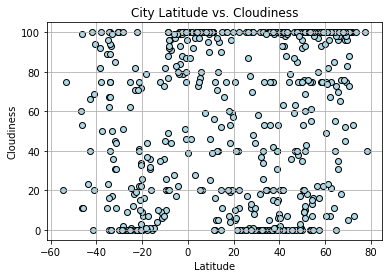

In [72]:
# This scatter plot depicts the latitudes of the various cities and their relative cloud cover.
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/city_lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

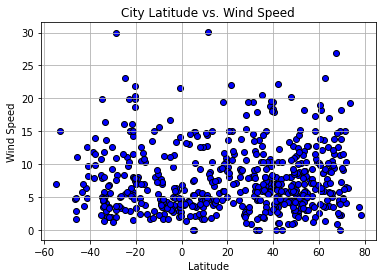

In [73]:
# This scatter plot depicts the latitudes of the various cities in comparison to the wind speed in each city.
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolors="blue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/city_lat_vs_winds.png")
plt.show()

## Linear Regression

In [74]:
north_hemis = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_hemis = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7938552366134103


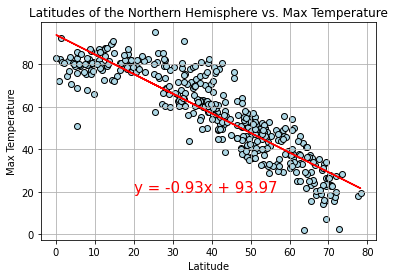

In [75]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/nhem_templat.png", mode="w")
plt.show()
# This scatter plot shows the latitudes of cities only in the northern hemisphere in relation to their maximum temperature.
# The linear regression in this model is negative. As values (latitude of the city) on the x-axis increase, values on the
# y-axis (temperature of a city) decrease. We can use this model to make the prediction that if the latitude of a city in 
# the northern hemisphere is very high, the temperature is going to be low.
# The r-squared value indicates (since it is above 0.5) that there is a strong positive correlation between this data.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-squared is: 0.4348808248459512


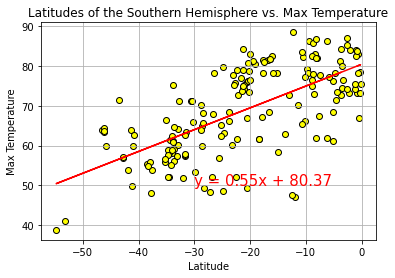

In [76]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="yellow", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/shem_templat.png", mode="w")
plt.show()
# This scatter plot shows the latitudes of cities only in the southern hemisphere in relation to their maximum temperature.
# This model shows positive linear regression.
# From the outcome of this scatter plot we can make the prediction that for cities in the southern hemisphere, as the 
# latitude rises (x-axis) so does the temperature (y-axis).
# The r-squared value indicates that there is some positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012595077649177604


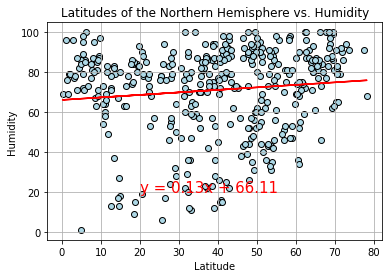

In [77]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/nhem_humlat.png", mode="w")
plt.show()
# This scatter plot shows us latitudes of cities only in the northern hemisphere and their humidity.
# From a glance, we don't see any definitive correlation or regression.
# There is a possible (very) weak positive regression line.
# The r-squared value, being so close to 0, indicatest that there is no or an extremely weak correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06961935145658887


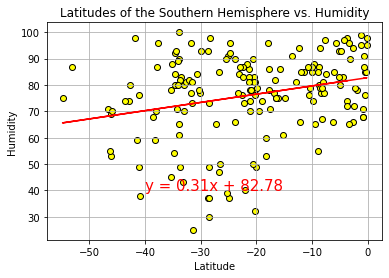

In [78]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="yellow", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/shem_humlat.png", mode="w")
plt.show()
# This scatter plot shows us latitudes of cities only in the southern hemisphere and their humidity.
# From a glance, we see little definitive correlation or regression.
# There is a weak positive regression line.
# Based on this model, we could  make the prediction that as the latitude of a city increases so would its humidity, but 
# there is plenty of data to counter that in this graph as well.
# The r-squared value, being so close to 0, indicatest that there is no or a very weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012993005128445676


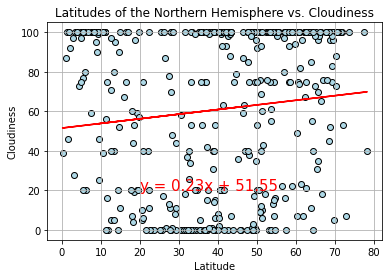

In [79]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/nhem_cloudlat.png", mode="w")
plt.show()
# This scatter plot shows us the latitude of cities only in the northern hemisphere and how much cloud cover they receive.
# Visually we see no correlation. Once a regression line is plotted, a weak positive regression line can be pertained.
# The r-squared value, being so close to 0, indicates no correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04474264307716729


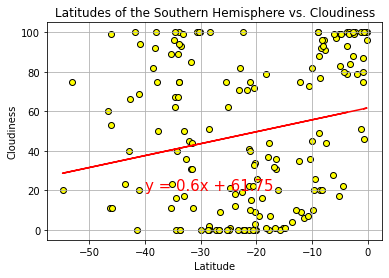

In [80]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="yellow", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/shem_cloudlat.png", mode="w")
plt.show()
# This scatter plot shows us the latitude of cities only in the southern hemisphere and how much cloud cover they receive.
# Visually we see no correlation. Once a regression line is plotted, a weak positive regression line can be pertained.
# The r-squared value, being so close to 0, indicates no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003413023536669188


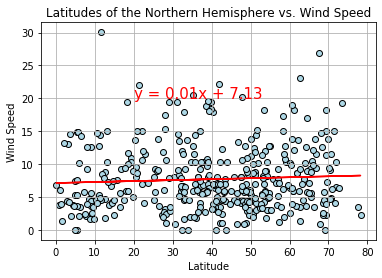

In [81]:
x_values = north_hemis["Lat"]
y_values = north_hemis["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightblue", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Latitudes of the Northern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/nhem_windlat.png", mode="w")
plt.show()
# This scatter plot shows us the latitudes of cities in only the northern hemisphere in comparison to their wind speeds.
# No visual correlation. The regression line is almost completely flat.
# The r-squared value is so close to 0 it indicates no correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008637035986231287


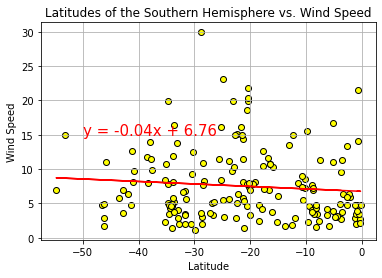

In [82]:
x_values = south_hemis["Lat"]
y_values = south_hemis["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="yellow", edgecolors="black")
plt.grid()
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.title("Latitudes of the Southern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/shem_windlat.png", mode="w")
plt.show()
# This scatter plot shows us the latitudes of cities in only the southern hemisphere in comparison to their wind speeds.
# Visually, it's possible there is a negative regression since the line very slightly slopes from left to right, but it is
# very weak.
# The r-squared value is so close to 0 it indicates no correlation.